# Importando as bibliotecas

In [5]:
# Importando bibliotécas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Lendo o arquivo de dados

In [28]:
turbina = pd.read_csv('dataset/T1.csv')

# Alterando o nome das colunas
turbina.columns = ['Data/Hora', 'Potencia(KW)', 'VelocidadeVento', 'CurvaTeorica(kwh)', 'DirecaoVento(°)']

# Deletando uma coluna que não será necessária para nossa 
del turbina['DirecaoVento(°)']

# Alterando a coluna Data/Hora para um tipo de dado dateTime
turbina['Data/Hora'] = pd.to_datetime(turbina['Data/Hora'], format='mixed')

turbina.head()
# turbina.info()

,Data/Hora,Potencia(KW),VelocidadeVento,CurvaTeorica(kwh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972


# Plotando os dados em um gráfico - Real

<Axes: xlabel='VelocidadeVento', ylabel='Potencia(KW)'>

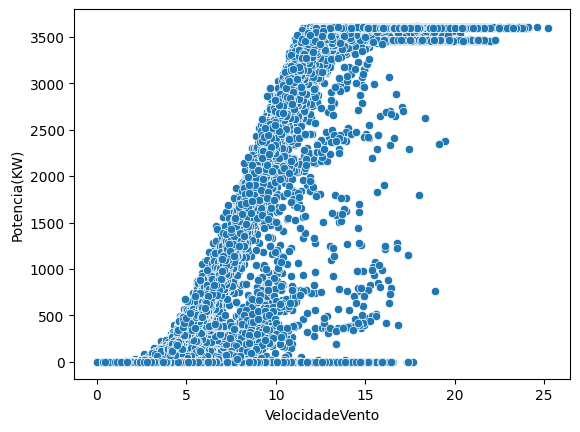

In [30]:
sns.scatterplot(data=turbina, x='VelocidadeVento', y='Potencia(KW)')

# Plotando os dados em um gráfico - Teórica

<Axes: xlabel='VelocidadeVento', ylabel='CurvaTeorica(kwh)'>

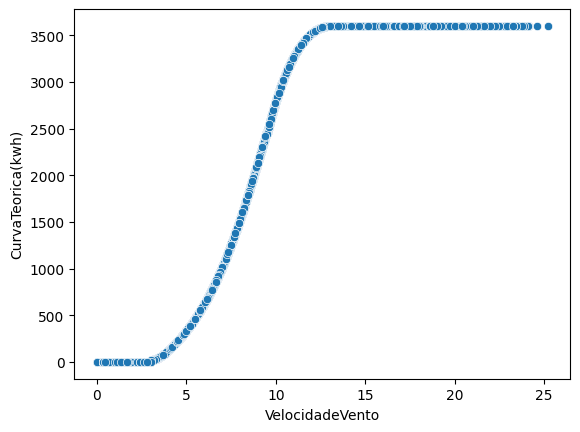

In [32]:
sns.scatterplot(data=turbina, x='VelocidadeVento', y='CurvaTeorica(kwh)')

# Criando "Limites aceitáveis"


In [40]:
# Criando a lista dentro_limite
pot_real = turbina['Potencia(KW)'].tolist()
pot_teorica = turbina['CurvaTeorica(kwh)'].tolist()

# Visualizando apenas 15 items da lista
# print(pot_real[0:15])

pot_max = []
pot_min = []
dentro_limite = []

# Percorrendo as listas a adicionando os valores nas listas pot_max e pot_min com um valor percentual pra cima ou pra baixo
for potencia in pot_teorica:
    pot_max.append(potencia * 1.05)
    pot_min.append(potencia * 0.95)

# Iterando a lista pot_real para verificar quem está dentro, fora ou no Zero do limite da turbin
for p, potencia in enumerate(pot_real):
    if potencia >= pot_min[p] and potencia <= pot_max[p]:
        dentro_limite.append('Dentro')
    
    elif potencia == 0:
        dentro_limite.append('Zero')
    
    else:
        dentro_limite.append('Fora')

# Verificando quantoas % estão dentro do limite estabelecido
print(dentro_limite.count('Dentro')/len(dentro_limite))
# print(len(pot_max), len(pot_min), len(pot_teorica))



0.37286760340391845


# Adicionando lista 'dentro_limite' ao dataframe

In [41]:
# Adicionando a lista dentro_limite no dataFrame para virar uma coluna
turbina['DentroLimite'] = dentro_limite
display(turbina)

,Data/Hora,Potencia(KW),VelocidadeVento,CurvaTeorica(kwh),DentroLimite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Dentro


# Plotando novamente o gráfico

<Axes: xlabel='VelocidadeVento', ylabel='Potencia(KW)'>

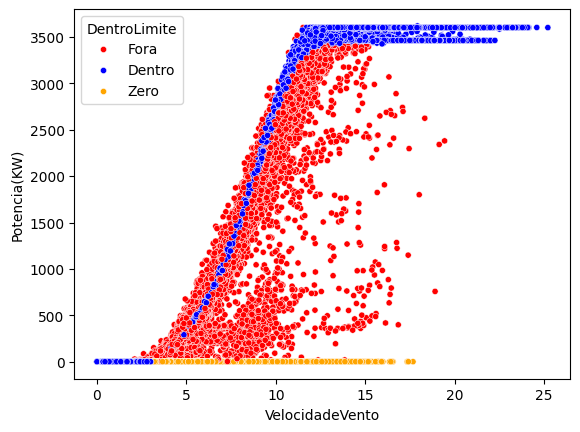

In [47]:
# Criando o gráfico e colocando o separador hur sendo a coluna criada
cores = {'Dentro': 'blue', 'Fora': 'red', 'Zero': 'orange'}
sns.scatterplot(data=turbina, x='VelocidadeVento', y='Potencia(KW)', hue='DentroLimite', s=20, palette=cores)